# Implementataion of Linear Regression using scikit-learn library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Advertising dataset from DATA folder

# To find whether there is a relation between money spent on each advertisement vs. sales 

# Advantage with multiple linear regression is that by seeing the coeff. 
# corresponding to each input feature (TV, radio, newspaper), we can observe 
# the effect of that particular i/p feature on the o/p (sales)

df=pd.read_csv("/home/smadhu/Downloads/Udemy/2022 Python for ML and DS/DATA/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


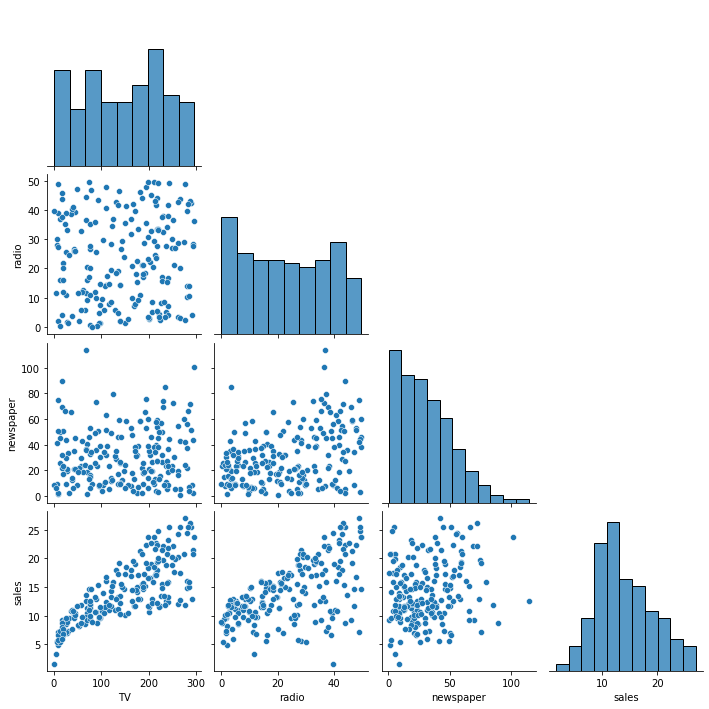

In [4]:
# before proceeding with the linear reg, first see the visual representation

#(i) we can plot individual plots/subplots of each i/p vs. o/p
# (ii) pairplot


# let us plot 'pairplot'- observe only last row- first 3 plots (TV vs. sales, radio vs. sales, newspaper vs. sales)



sns.pairplot(data=df,corner=True)

In [5]:
# from the above plot, it is clear that as the money spent on TV and radio increases, the sales also increases

# but for newspaper, it is not clear

In [6]:
# seperate input features into a matrix
# in the df, except last column (sales), remaining columns are i/p features
# so drop the last column from df


X = df.drop('sales',axis=1)

In [7]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
# in later topics, we will be doing feature engineering (data preprocessing)
# but now, let us proceed with the same data as it is\


In [9]:
# take o/p (sales) in to a seperate variable

y = df['sales']

In [10]:
# train, test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# 30% of our data will be used as test data

# 'random_state' is for: 

# (i)  splitting the data into same value partitions when we are going to compare different ML alg. 
#      because when we are comparing we have to give same training set and test set to each ML alg. 
#      To maintain that consistency, we have to give same seed value

# (ii) shuffling the data randomly (because in many datasets the data would be in sorted order)
#      we should not give sorted data to ML alg.s Hence we have to shuffle data randomly 
#      and then pick 70% for training and 30% for testing

In [11]:
len(df)

200

In [12]:
len(X_train)   # 70% is for X_train

140

In [13]:
len(X_test)   # 30% is for X_test

60

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# CREATING MODEL

model = LinearRegression()     # 'model' is user-defined name

# initially go with all default parameters (hyperparameters in ML language) of the function (ML model) of t
# later based on the performance, we can tweak the hyperparameters of the model

In [16]:
# FITTING THE MODEL - TRAINING

model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_predictions = model.predict(X_test)    # predictions for y_test

In [18]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

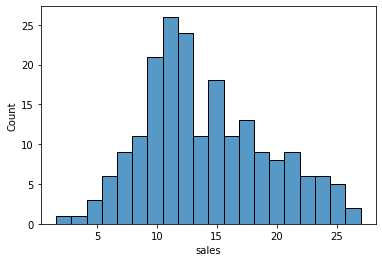

In [19]:
sns.histplot(data=df,x='sales',bins=20)

In [20]:
# PERFORMANCE EVALUATION OF THE MODEL

from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_test, y_predictions)


# whether this mean absolute error (MAE) value of 1.21 is good?, 
# (i) either compare with another good model (ML alg)
#(ii) or compare with the "mean of sales" value is 14.02

# MAE is around 10% of "mean of sales", which means our model is not that bad


1.213745773614481

In [21]:
mean_squared_error(y_test,y_predictions)

# this MSE cannot be compared with "mean of sales" as the MSE is square of the diff b/w actual and predicted (i.e. square of the metric)

2.2987166978863782

In [22]:
# hence calculate RMSE, which can be comparable with "mean of sales"

np.sqrt(mean_squared_error(y_test,y_predictions))

1.516151937599388

In [23]:
# RMSE is kind of std.deviation, 1.51 (10% range) is an okay value w.r.t. "mean of sales"

# if MAE is small and RMSE is large--> model is good for most of the points butfew points are away from the fitted line, hence the RMSE squared that error and became large 

In [24]:
# SAVING and LOADING MODEL 

In [25]:
# after being satisfied with the performance of the model, we then can save the model and load it whenever we want to predict on a new data point

In [26]:
final_model = LinearRegression()

In [27]:
final_model.fit(X,y)   # fit the model on the ENTIRE data set

# DEPLOYMENT to the real-world: 
# the model would be deployed by FITTING and TRAINING (NO TESTING) on the ENTIRE data X and Y
# since we are going to train on Entire X and Y, we cannot evaluate again.

LinearRegression()

In [28]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [29]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [30]:
# 0.04576465 is the coeff for amount spend on TV advertising
# 0.18853002 is for radio and -0.00103749 for newspaper


In [31]:
# Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of 0.045 "sales units", in this case 1000s of units .
# This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.

# Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of 0.188 "sales units", in this case 1000s of units .
# This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.

# Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a decrease in sales of 0.001 "sales units", in this case 1000s of units .
# This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.

In [32]:
# because of negative coeff for newspaper, it has no effect on the sales and 
# it can be ignored, i.e. no need to spend money on newspaper as it has no effecton final sales

In [170]:
# POLYNOMIAL REGRESSION

In [34]:
df=pd.read_csv("/home/smadhu/Downloads/Udemy/2022 Python for ML and DS/DATA/Advertising.csv")

In [35]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
X = df.drop('sales',axis=1)

In [37]:
y = df['sales']

In [38]:
df=pd.read_csv("/home/smadhu/Downloads/Udemy/2022 Python for ML and DS/DATA/Advertising.csv")

In [39]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [40]:
X = df.drop('sales',axis=1)

In [41]:
y = df['sales']

In [42]:
from sklearn.preprocessing import PolynomialFeatures

# preprocessing module has polynomial regression

In [43]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# an instance or object is created

# go through help to know abt the parameters
# degree=2, so 2nd order non-linear terms with interaction terms also will be created
# 'bias' term is not created because we will be using linear reg later

In [44]:
polynomial_converter.fit(X)

# this is just a feature converter, not an ML model. So, no need to split data into train and test parts
# 'fit' here means grab all the columns and analyze, but not transform the columns, i.e. hihger-order terms will not be generated with 'fit' command

PolynomialFeatures(include_bias=False)

In [45]:
poly_features = polynomial_converter.transform(X)

In [46]:
poly_features.shape

(200, 9)

In [47]:
X.shape

(200, 3)

In [48]:
# from 3 features in i/p X, poly has generated 9 features

In [49]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [50]:
# if we assume TV, radio, newspaper as a, b, c then the poly_features has
# 9 terms: a,b,c, ab, bc,ca, a^2, b^2, c^2

In [51]:
# fit and transform has created 9 features from 3 i/p features
# now it is time to apply linear reg on these 9 features treating this as a new dataset

In [52]:
# the two calls .fit and .transform are put into a single call as below 


# this does the same job as calling them individually

# we got the same data as earlier (where we called them seperately)

# OPTIONAL- FIT & TRANSFORM CAN BE COMBINED INTO A SINGLE COMMAND
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

## Linear Regression on polynomial features

In [53]:
# lets call train test split and apply linear reg like what we did in linear reg
# but our i/p now is 9 features generated by polynomial features

# we have to save 'polynomial_converter' also because if we get an i/p (for future prediction) with 3 features, we have to generate 9 using this poly conv only

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
newx = pd.DataFrame(poly_features)   # creation of dataframe from the poly_features data

In [56]:
newx.head()

,0,1,2,3,4,5,6,7,8
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [57]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y , test_size=0.3, random_state=101)


# X_train, X_test, y_train, y_test = train_test_split(newx, y , test_size=0.3, random_state=101)

# we can pass poly_features also becoz train_test_split accepts numpy array or pandas dataframe as i/p


# VERY IMPORTANT: to compare this poly method with linear reg, use test size=0.3 and random_state=101 (because we used this set of values there)

In [58]:

# importing linear reg model from sklearn

from sklearn.linear_model import LinearRegression


In [59]:
model = LinearRegression()

In [60]:
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_predictions = model.predict(X_test)

In [62]:
model.coef_


# coefficients of linear reg

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [63]:
# PERFORMANCE EVALUATION

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
MAE = mean_absolute_error(y_test,y_predictions)

In [66]:
MSE = mean_squared_error(y_test,y_predictions)

In [67]:
RMSE = np.sqrt(MSE)

In [68]:
MAE

0.4896798044803811

In [69]:
MSE

0.4417505510403745

In [70]:
RMSE

0.6646431757269268

In [71]:
# these values are better than linear reg: MAE=1.21, MSE=2.29, RMSE=1.52 

# This comparison can be made only when we spilt the data in the same way that is followed in linear reg,
#that's why we gave tes_size=0.3 and random_state=101


In [72]:
# Comparing performance metrics of both Polynomial reg and Linear reg, it clear that
# Polynomial reg is doing a good job

In [73]:
X.loc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [74]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [75]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [76]:
# if we observe the the coefficients, some of them especially related to squared features are very small
# for example newspaper squared 69.2*69.2 = 4.788e+03 (last one in the poly_features array)
# the corresponding coeff is -3.047e-05 (last one in model.coef_), which is very small

# Polynomial Regression- Choosing Optimum Degree of Polynomial

In [77]:
# STEPS for choosing the OPTIMUM DEGREE of Polynomial

In [78]:
# create different order polynomials
# split polynomial features into train and test sets
# create linear reg model, fit on train data
# make predictions on test data
# save the rmse for both train and test data
# plot the results (error vs polynomial degree order) for both train and test data

In [79]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):        # loop from 1 to 10th order polynomial. 
                             # but practically we will not consider 10th order for an i/p with 3 features
    
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    
    model.fit(X_train, y_train)
    
    y_predictions_train = model.predict(X_train)
    
    y_predictions_test = model.predict(X_test)
    
    
    train_rmse = np.sqrt(mean_squared_error(y_predictions_train, y_train))
    
    test_rmse = np.sqrt(mean_squared_error(y_predictions_test, y_test))
    
    
    train_rmse_errors.append(train_rmse)
    
    test_rmse_errors.append(test_rmse)
    
    
    

In [80]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.35170836883993467,
 0.25093429467703415,
 0.19712640340673274,
 5.421420423901486,
 0.14180399863580023,
 0.16654350003388188]

In [81]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269268,
 0.5803286825165035,
 0.5077742648623355,
 2.575831205082372,
 4.492668770849738,
 1381.4043738479102,
 4449.599764768951,
 95891.24543764145]

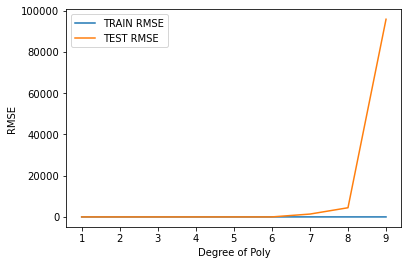

In [82]:
plt.plot(range(1,10),train_rmse_errors[:],label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')

plt.legend()

In [83]:
# it appears that the error for TEST data startes increasing from 8th degree
# but from the 'test_rmse_errors' array, the error increased from 4th to 5th degree

# lets plot upto 5th degree to visualize this

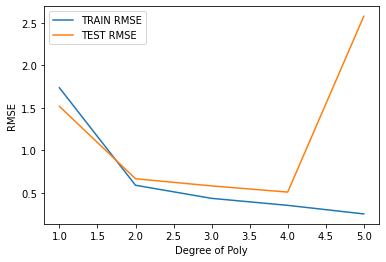

In [84]:
plt.plot(range(1,6),train_rmse_errors[0:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[0:5],label='TEST RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')

plt.legend()

In [85]:
# from 4th degree polynomial onwards, the error (RMSE) started increasing

In [86]:
# FOR THE GIVEN DATA SET

# from the above plots, it is better to choose either 2nd or 3rd degree polynomial

# but dont go for 4th degree because of high complexity and immediate increase in RMSE from threafter

# Regularization- way to reduce overfitting by adding an extra bias

In [88]:
# make our data ready to implement and compare different Regularization methods

In [89]:
# Feature Scaling: two methods
# (i) Standardization: normal distribution: X_new = (x-mean)/(std.dev)   
# (ii) Normalization: X_new = (X-Xmin)/(Xmax=Xmin)


# here, we are considering Standardization method of Feature scaling

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df=pd.read_csv("/home/smadhu/Downloads/Udemy/2022 Python for ML and DS/DATA/Advertising.csv")

In [92]:
X = df.drop('sales',axis=1)

In [93]:
y=df['sales']

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

# we have chosen 3rd degree becoz in Polynomial reg, we identified that degree=3 is optimum 

In [96]:
poly_features = polynomial_converter.fit_transform(X)

In [97]:
poly_features.shape

(200, 19)

In [98]:
X.shape

(200, 3)

In [99]:
# actual i/p has 3 features, but using 3rd degree polynomial features with degree=3, 
# we generated 19 i/p features (all possible combinations of degree=1,2,3)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# VERY IMPORTANT: to compare this poly method with linear reg, use test size=0.3 and random_state=101 (because we used this set of values in all the places)

In [102]:
# SCALE the DATA

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

In [105]:
# FEATURE SCALING:

# when we call scaler.fit(somedata), it calculates mean and var of 'somedata'

# TRAINING DATA: we have to FIT AND TRANSFORM

# TEST DATE: we have to ONLY TRANSFORM
# training data has to be completely unknown to us
# hence using the stats (like mean and var) of Training data, we have to scale the Test data


In [106]:
scaler.fit(X_train)

StandardScaler()

In [107]:
scaled_X_train = scaler.transform(X_train)   # scaled version of training data

In [108]:
scaled_X_test = scaler.transform(X_test)          # scaled version of test data

In [109]:
scaled_X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [110]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [111]:
# all the input features (in poly_features) are scaled (check scaled_X_train)

In [112]:
scaled_X_test[0]

array([-0.91339472,  1.76259419,  0.68168558, -0.96397506,  0.01521221,
       -0.29304821,  2.31532893,  1.56001049,  0.36991011, -0.87527811,
       -0.53295016, -0.54312331,  0.43542739,  0.18669917, -0.2012045 ,
        2.77252075,  2.09516506,  0.89465642,  0.09868885])

# RIDGE REGRESSION- L2 REGRESSION

In [113]:
# Idea of Ridge regression

# add an extra term to the Residual Sum of Squares (RSS) such that it tries to reduce the overfitting
# this extra term reduces the slope of the fitted line (in case of 1 i/p feature)
# but in general it reduces the high variance (over-fitting) by adding an extra bias
# this extra term is lambda (named as alpha in scikit) times sum of squares of coeff's

In [114]:
from sklearn.linear_model import Ridge

In [115]:
ridge_model = Ridge(alpha=10)

In [116]:
ridge_model.fit(scaled_X_train,y_train)

Ridge(alpha=10)

In [117]:
y_predictions = ridge_model.predict(scaled_X_test)

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [119]:
MAE = mean_absolute_error(y_test, y_predictions)

In [120]:
MAE

0.5774404204714183

In [121]:
RMSE = np.sqrt(mean_squared_error(y_test, y_predictions))

In [122]:
RMSE

0.8946386461319685

In [123]:
# BIG QUESTION is how to know that alpha=10 is best choice?

# We have to do cross-validation

In [124]:
from sklearn.linear_model import RidgeCV

# RidgeCV- Ridge regression Cross Validation(CV)
# this performs CV for a variety of 'alpha' values and REPORTS BEST ALPHA value

In [125]:
# as per scikit-learn implementation, all the metrics- higher is the better
# even if we want to reduce RMSE, we take negative of RMSE and try to increase negative RMSE

In [126]:
# what is the performance measure that it has used to measure best alpha?

In [127]:
from sklearn.metrics import SCORERS

In [128]:
SCORERS.keys()

# these are the performance measures available, choose one as per the model

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [129]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [130]:
ridge_cv_model.fit(scaled_X_train, y_train)

# In CROSS VALIDATION, whole data is divided into Training, Validation and Test data
# In scikit implementation, when we pass 'scaled_X_train', this will be divided into Training and Validation sets
# 'scaled_X_test' acts as the FINAL TEST DATA, which is not seen the model at all

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [131]:
ridge_cv_model.alpha_

# this is the best value of 'alpha' that performed better

0.1

In [132]:
# calculation of performace metrics

In [133]:
y_predictions = ridge_cv_model.predict(scaled_X_test)

In [134]:
MAE = mean_absolute_error(y_test, y_predictions)

In [135]:
MAE

0.42737748843352086

In [136]:
RMSE = np.sqrt(mean_squared_error(y_test,y_predictions))

In [137]:
RMSE

0.6180719926924644

In [138]:
# alpha=0.1 achieves best MAE and RMSE compared to that of alpha=10

In [139]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

# LASSO (Lease Absolute Shrinkage and Selection Operator)- L1 REGULARIZATION

In [140]:
from sklearn.linear_model import LassoCV

In [141]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100,cv=5)

# go through the help to know more about the parameters of LassoCV

# 'eps' ratio of minimum to maximum alpha. the smaller is 'eps', the wider is the alpha range
#  n_alphas- total no.of alphas to check
#  cv- cross validation fold number
#  max_iter- no.of iterations can also be given

In [142]:
lasso_cv_model.fit(scaled_X_train, y_train)

LassoCV(cv=5, eps=0.1)

In [143]:
lasso_cv_model.alpha_

# this is the best alpha value

0.4943070909225828

In [144]:
y_predictions = lasso_cv_model.predict(scaled_X_test)

In [145]:
MAE = mean_absolute_error(y_test,y_predictions)

In [146]:
MAE

0.6541723161252854

In [147]:
RMSE = np.sqrt(mean_squared_error(y_test,y_predictions))

In [148]:
RMSE

1.130800102276253

In [149]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [150]:
# Improvement of Results- different parameters of Lasso

In [151]:
# majority of the coeffs are zero, it has considered only two i/p polynomial features

# LASSO (L1) produced a reasonable MAE and RMSE with only two i/p poly features

# whereas, Ridge (L2) regularization considered all the i/p polynomial features, so the model is complex

In [152]:
# we can try different 'eps' and 'max_iter' in Lasso, 
# to get a better MAE and RMSE 

lasso_cv_model = LassoCV(eps=0.001, n_alphas=100,cv=5,max_iter=1000000)
lasso_cv_model.fit(scaled_X_train, y_train)
y_predictions = lasso_cv_model.predict(scaled_X_test)
MAE = mean_absolute_error(y_test,y_predictions)
RMSE = np.sqrt(mean_squared_error(y_test,y_predictions))

In [153]:
MAE

0.43350346185900757

In [154]:
RMSE

0.6063140748984036

In [155]:
# by trying diff values for 'eps' and 'max_iter', we have got good MAE and RMSE

In [156]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

# ELASTIC NET- Combination of L1 and L2 Regularization

In [157]:
from sklearn.linear_model import ElasticNetCV

In [158]:
elasticnet_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],
                                eps=0.001,n_alphas=100,max_iter=1000000)


In [159]:
elasticnet_model.fit(scaled_X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [160]:
elasticnet_model.l1_ratio_

# this is the best l1_ratio is 1, which means go with Lasso only
# since it is 1, the Ridge coeff becomes Zero and it gets eliminated from equ.

1.0

In [161]:
elasticnet_model.alpha_

0.004943070909225827

In [162]:
lasso_cv_model.alpha_

# both elasticnet alpha value and lasso_cv alpha are same
# a side remark

0.004943070909225827

In [163]:
y_predictions = elasticnet_model.predict(scaled_X_test)

In [164]:
MAE = mean_absolute_error(y_test, y_predictions)

In [165]:
RMSE = np.sqrt(mean_squared_error(y_test,y_predictions))

In [166]:
MAE

0.43350346185900757

In [167]:
RMSE

0.6063140748984036

In [168]:
# both MAE and RMSE are same as Lasso model values

In [171]:
# try directly Elasticnet, instead of trying either Lasso or Ridge on any given dataset. 

# Elasticnet would tell what is the optimum Lasso or Ridge combination to consider.

In [172]:
# SVM

In [174]:
from sklearn.svm import SVR

In [175]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1], 'kernel':['linear','rbf','poly'],
             'gamma':['scale','auto'],'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

#'degree' will be used when kernel is 'poly'
# 'gamma' will be used when kernel is 'rbf'

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
svr = SVR()

# create a default ML model so that we can perform gridsearch

In [178]:
grid = GridSearchCV(svr, param_grid)

In [179]:
grid.fit(scaled_X_train, y_train)

# fit the grid model with scaled_X_train and y_train

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [180]:
grid.best_params_

# these are the best parameters after performing grid search

{'C': 1, 'degree': 2, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [181]:
grid_y_pred = grid.predict(scaled_X_test)

In [182]:
mean_absolute_error(y_test, grid_y_pred)

0.5174135712972127

In [183]:
np.sqrt(mean_squared_error(grid_y_pred, y_test))

0.730665612088445

In [185]:
# CONCLUSION:

# Lasso Regularization with Polynomial features Regression has given best MAE and RMSE out of all the methods ..
# (linear regression, linear regression with polynomial features with regularization and SVM)